# Usage (quickest version)
Thank you for using CovsirPhy!!  
This is the quickest tour to get an overview of CovsirPhy.

- Download datasets
- Parameter estimation with phase-dependent SIR-derived models
- Simulate the number of cases

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
from pprint import pprint

In [4]:
import covsirphy as cs
cs.__version__

'2.9.1'

## Dataset preparation
Download the datasets to "input" directory and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [5]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)

Note:  
Datasets were retrieved via [COVID-19 Data Hub](https://covid19datahub.io/https://covid19datahub.io/) and the citation is  
Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

Scenario analysis can be performed for the following countries.

In [6]:
pprint(set(jhu_data.countries()) & set(population_data.countries()), compact=True)

{'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Congo', 'Costa Atlantica', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 

## Start scenario analysis
As an example, we will analysis the number of cases in Italy. Scenario analysis can be performed with `Scenario` class. To initialize this class, we need to specify the country name.

In [7]:
snl = cs.Scenario(jhu_data, population_data, country="Italy")

## Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

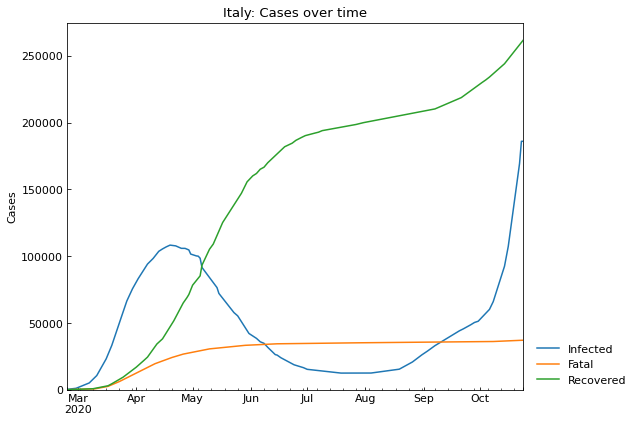

,Date,Confirmed,Infected,Fatal,Recovered
239,2020-10-20,434449,142739,36705,255005
240,2020-10-21,449648,155442,36832,257374
241,2020-10-22,465726,169302,36968,259456
242,2020-10-23,484869,186002,37059,261808
243,2020-10-24,484869,186002,37059,261808


In [8]:
df = snl.records()
df.tail()

## S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

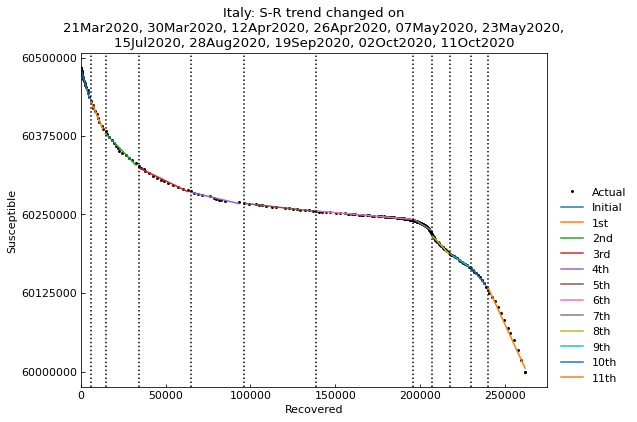

In [9]:
_ = snl.trend()

Summarize the phases.

- Type: "Past" or "Future"
- Start: start date of the phases
- End: end date of the phases
- Population: total population in the phases

In [10]:
snl.summary()

,Type,Start,End,Population
0th,Past,24Feb2020,20Mar2020,60483973
1st,Past,21Mar2020,29Mar2020,60483973
2nd,Past,30Mar2020,11Apr2020,60483973
3rd,Past,12Apr2020,25Apr2020,60483973
4th,Past,26Apr2020,06May2020,60483973
5th,Past,07May2020,22May2020,60483973
6th,Past,23May2020,14Jul2020,60483973
7th,Past,15Jul2020,27Aug2020,60483973
8th,Past,28Aug2020,18Sep2020,60483973
9th,Past,19Sep2020,01Oct2020,60483973


## Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [11]:
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	11th phase (11Oct2020 - 24Oct2020): finished  471 trials in 0 min 15 sec


	 1st phase (21Mar2020 - 29Mar2020): finished 1217 trials in 0 min 40 sec

	 0th phase (24Feb2020 - 20Mar2020): finished 1666 trials in 1 min  0 sec

	 2nd phase (30Mar2020 - 11Apr2020): finished 1675 trials in 1 min  0 sec

	 3rd phase (12Apr2020 - 25Apr2020): finished 1674 trials in 1 min  0 sec

	 5th phase (07May2020 - 22May2020): finished  191 trials in 0 min  5 sec

	 8th phase (28Aug2020 - 18Sep2020): finished  371 trials in 0 min 10 sec

	 6th phase (23May2020 - 14Jul2020): finished  509 trials in 0 min 15 sec

	 9th phase (19Sep2020 - 01Oct2020): finished  207 trials in 0 min  5 sec

	 4th phase (26Apr2020 - 06May2020): finished 1720 trials in 1 min  0 sec

	 7th phase (15Jul2020 - 27Aug2020): finished 1693 trials in 1 min  0 sec

	10th phase (02Oct2020 - 10Oct2020): finished 1797 trials in 1 min  0 sec

Completed optimization. Total: 2 min 31 sec


## History of reproduction number
Let's see the history of parameter values. Reproduction number is here.

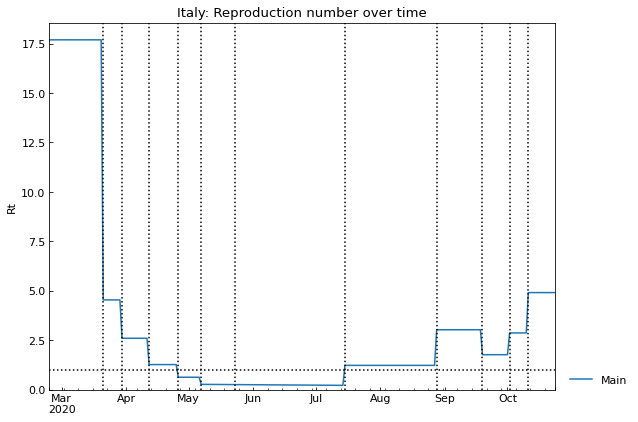

In [12]:
_ = snl.history(target="Rt")

## History of parameters
History of each parameter. Values will be divided by the values in 0th phase.

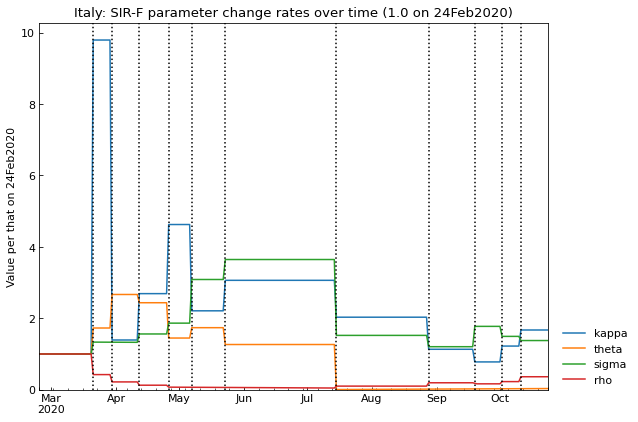

In [13]:
_ = snl.history_rate()

## Simulate the number of cases
How many cases will be in 30 days if the parameter values will not be changed from today?

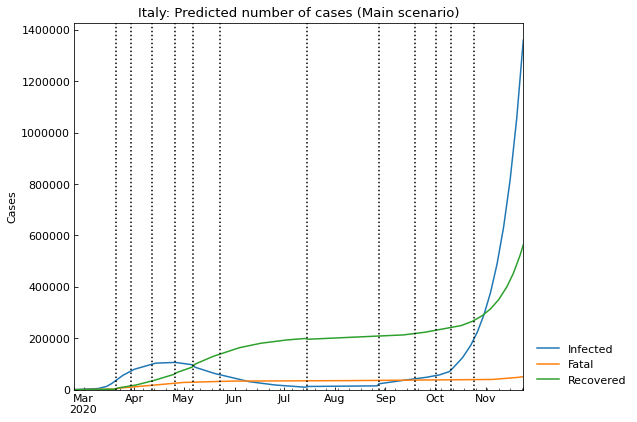

In [14]:
# Add a phase with 30 days from the date of the last record
snl.add(days=30)
_ = snl.simulate()

Next, please see [Usage (quick version)](https://lisphilar.github.io/covid19-sir/usage_quick.html) to find details of datasets and how to perform scenario analysis.  
Thank you!